# Submission by:
    Name: Sarthak Punjabi
    Student Number: 21183147
    Module Name: CS4168 Data Mining
    Lab Number: 2
    
    

# `Lab 2 - Clustering and Manifold Learning`

We noticed a few flaws when exploring the *loans* dataset, which need to be addressed before the dataset is appropriate for machine learning (ML). *Data preparation*, *data preprocessing*, *data munging*, or *data wrangling* are all terms used to describe this procedure. 

Here are some of the issues that we are already aware of: 

- Some columns have blank values in them. These values can be estimated based on the amount of missing values and the column's predicted relevance. 

- We noticed that the fields 'ApplicantIncome' and 'LoanAmount' both appear to have high numbers on either end. Despite the fact that they appear to make sense, they should be handled with care.

## **`Importing Libraries`**

In [1]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## **`Importing Dataset`**

In [2]:
data = pd.read_csv("../datasets/bank.csv")


## **`Calculating the Percentage of Missing values`**

In [3]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
percent

poutcome      22.70
contact        9.55
education      5.20
age            0.60
job            0.50
default        0.00
balance        0.00
housing        0.00
loan           0.00
day            0.00
month          0.00
duration       0.00
campaign       0.00
pdays          0.00
previous       0.00
marital        0.00
subscribed     0.00
dtype: float64

## Let's make a copy of the dataset before we start changing it.

In [4]:
df = data

In [5]:
print(df.nunique())

age             68
job             11
marital          3
education        3
default          2
balance       1274
housing          2
loan             2
contact          2
day             31
month           12
duration       655
campaign        11
pdays          363
previous        26
poutcome         3
subscribed       2
dtype: int64


## Encoding Categorical Features .
#### One Hot Encoder - Independent Variable (Get_dummies Same as that)
#### LabelEncoder - Dependent Variable


##### -- Columns with nan's

In [6]:
df1 = pd.get_dummies(data=df,columns=["poutcome","contact","education","job"],dummy_na=True,drop_first=True)
df1                        

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan
0,32.0,single,no,392,yes,no,1,apr,957,2,...,0,0,0,0,0,0,0,1,0,0
1,39.0,divorced,no,688,yes,yes,1,apr,233,2,...,0,0,0,0,0,0,0,1,0,0
2,59.0,married,no,1035,yes,yes,1,apr,126,2,...,0,0,0,1,0,0,0,0,0,0
3,47.0,married,no,398,yes,yes,1,apr,274,1,...,0,0,0,0,0,0,0,0,0,0
4,54.0,married,no,1004,yes,no,1,apr,479,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,20.0,single,no,2785,no,no,16,sep,327,2,...,0,0,0,0,0,0,1,0,0,0
1996,28.0,single,no,127,no,no,16,sep,1334,2,...,0,0,0,0,0,0,0,0,0,0
1997,81.0,married,no,1154,no,no,17,sep,231,1,...,0,0,0,1,0,0,0,0,0,0
1998,46.0,married,no,4343,yes,no,20,sep,185,1,...,0,0,0,0,0,1,0,0,0,0


#### --Process and Encode the Categorical Features

In [7]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,subscribed_yes
0,32.0,392,1,957,2,131,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.0,688,1,233,2,133,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,59.0,1035,1,126,2,239,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47.0,398,1,274,1,238,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,54.0,1004,1,479,1,307,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


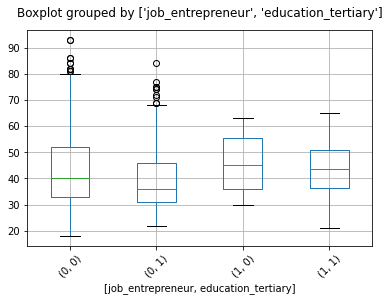

In [8]:
df.boxplot(column='age', by=['job_entrepreneur','education_tertiary'], rot=45)
plt.title("")
plt.show()

### Distribution Analysis for Categorical Attributes

In [9]:
ptable = df.pivot_table(values='age', 
                        index='job_entrepreneur',
                        columns='education_tertiary',  
                        aggfunc=np.median)

### `Treating the missing values`

In [10]:
def get_element(y):
    return ptable.loc[y['job_entrepreneur'], y['education_tertiary']]


df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

### `Rescaling Features`

In [11]:
robust_scaler = RobustScaler()
df[['duration',
    'pdays']] = robust_scaler.fit_transform(df[['duration',
                                                     'pdays']])

### `Treatment of outliers`

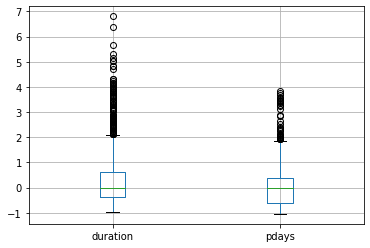

In [12]:
df.boxplot(column=['duration','pdays'])
plt.show()

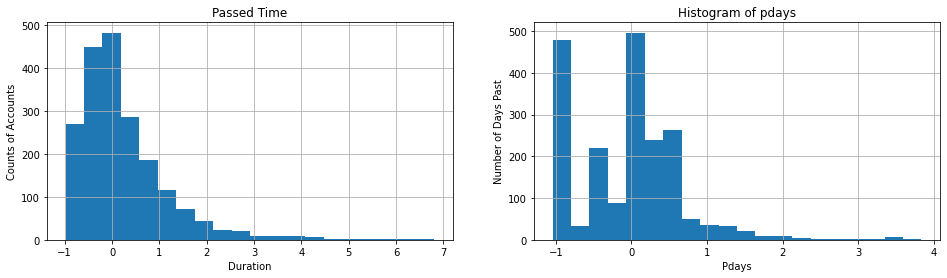

In [13]:
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Passed Time")
ax1.set_xlabel('Duration')
ax1.set_ylabel('Counts of Accounts')
df['duration'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of pdays")
ax3.set_xlabel('Pdays')
ax3.set_ylabel('Number of Days Past')
df['pdays'].hist(bins=20)

plt.show()

In [14]:
df[['duration', 'pdays']].min()

duration   -0.982833
pdays      -1.044223
dtype: float64

In [15]:
df['duration'] = np.log(df['duration']+2.26)
df['pdays'] = np.log(df['pdays']+2.85)

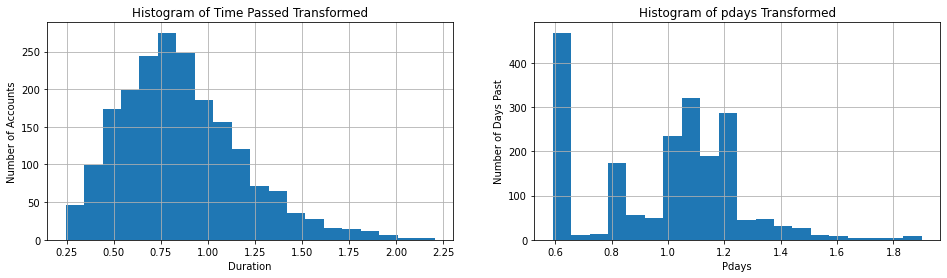

In [16]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Time Passed Transformed")
ax1.set_xlabel('Duration')
ax1.set_ylabel('Number of Accounts')
df['duration'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of pdays Transformed")
ax3.set_xlabel('Pdays')
ax3.set_ylabel('Number of Days Past')
df['pdays'].hist(bins=20)

plt.show()

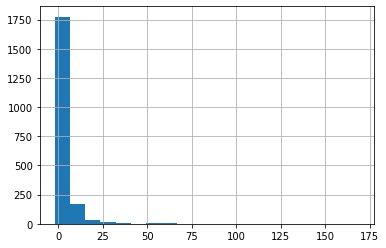

In [17]:
df['balance'] = df['balance']/480
df['balance'].hist(bins=20)
plt.show()

### `Deriving a new Feature`

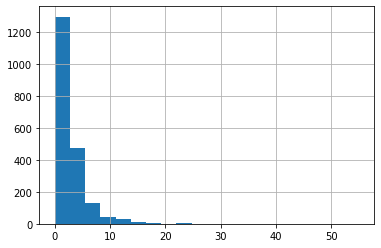

In [18]:
df['previous'].hist(bins=20)
plt.show()

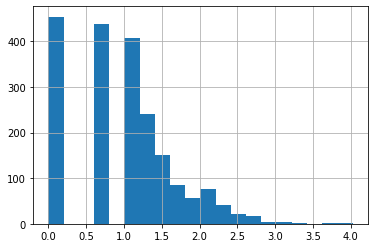

In [19]:
np.log(df['previous']+1).hist(bins=20)
plt.show()

#### **Creation of new Total Income Block**

In [20]:
df['TotalDays'] = df['pdays'] + df['previous']
df[['TotalDays']] = robust_scaler.fit_transform(df[['TotalDays']])
df[['TotalDays']].min()

TotalDays   -1.038712
dtype: float64

In [21]:
df['TotalDays'] = np.log(df['TotalDays']+2.19)

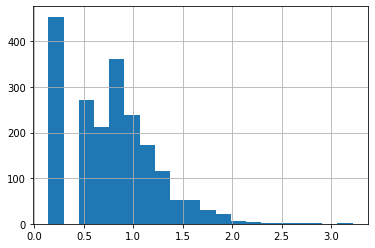

In [22]:
df['TotalDays'].hist(bins=20)
plt.show()

In [23]:
df.drop('previous', axis=1, inplace=True)

## `Generating the end csv`

In [24]:
df.to_csv('Bank_new.csv')